In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
plt.style.use('seaborn-deep')

# SF Crime

In [3]:
df = pd.read_csv('crime.csv')

In [4]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
0,110914565,WARRANTS,WARRANT ARREST,Friday,05/29/2015 12:00:00 AM,16:42,SOUTHERN,"ARREST, BOOKED",BRYANT ST / 8TH ST,-122.406971,37.772527,"(37.7725273607571, -122.406970988225)"
1,120789988,MISSING PERSON,FOUND PERSON,Monday,05/16/2016 12:00:00 AM,00:41,INGLESIDE,NONE,WOOLSEY ST / UNIVERSITY ST,-122.412470,37.722659,"(37.7226585129212, -122.412469643631)"
2,150020821,ASSAULT,ELDER ADULT OR DEPENDENT ABUSE (NOT EMBEZZLEME...,Friday,01/02/2015 12:00:00 AM,12:00,NORTHERN,NONE,300 Block of FULTON ST,-122.422536,37.778796,"(37.7787958771466, -122.422536478306)"
3,150020978,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Wednesday,01/07/2015 12:00:00 AM,19:21,CENTRAL,"ARREST, BOOKED",MONTGOMERY ST / CHESTNUT ST,-122.405178,37.804764,"(37.80476375718, -122.405178220847)"
4,150020984,ROBBERY,ROBBERY OF A CHAIN STORE WITH A DANGEROUS WEAPON,Wednesday,01/07/2015 12:00:00 AM,19:27,SOUTHERN,NONE,1100 Block of MARKET ST,-122.413564,37.779514,"(37.779514030063, -122.413564091744)"


In [5]:
df.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location'],
      dtype='object')

## 1) What different types of incidents are there? How frequently has each type occurred?

In [6]:
df['Category'].describe()

count           1922818
unique               39
top       LARCENY/THEFT
freq             394046
Name: Category, dtype: object

There are 39 different types of incidents:

In [7]:
df['Category'].value_counts()

LARCENY/THEFT                  394046
OTHER OFFENSES                 273803
NON-CRIMINAL                   205217
ASSAULT                        168344
VEHICLE THEFT                  115581
DRUG/NARCOTIC                  112540
VANDALISM                       98064
WARRANTS                        91334
BURGLARY                        80167
SUSPICIOUS OCC                  69020
MISSING PERSON                  56545
ROBBERY                         49417
FRAUD                           36546
SECONDARY CODES                 22029
FORGERY/COUNTERFEITING          21965
WEAPON LAWS                     18895
TRESPASS                        16190
PROSTITUTION                    15803
STOLEN PROPERTY                 10306
SEX OFFENSES, FORCIBLE           9774
DRUNKENNESS                      9145
DISORDERLY CONDUCT               9114
RECOVERED VEHICLE                7597
DRIVING UNDER THE INFLUENCE      5042
KIDNAPPING                       4906
RUNAWAY                          4027
LIQUOR LAWS 

New questions: What do these mean?
* Other offenses
* Non-criminal
* Warrants
* Suspicious occ
* Secondary codes
* Forgery/counterfeiting
* Weapon laws
* Family offenses
* Sex offenses, non forcible
* Trea

### Other Offenses

In [8]:
df[df['Category'] == 'OTHER OFFENSES']['Descript'].value_counts()

DRIVERS LICENSE, SUSPENDED OR REVOKED                                        58420
TRAFFIC VIOLATION                                                            34748
RESISTING ARREST                                                             19066
MISCELLANEOUS INVESTIGATION                                                  17897
PROBATION VIOLATION                                                          16627
LOST/STOLEN LICENSE PLATE                                                    14344
VIOLATION OF RESTRAINING ORDER                                               12297
TRAFFIC VIOLATION ARREST                                                     12250
PAROLE VIOLATION                                                             10260
CONSPIRACY                                                                    6650
FALSE PERSONATION TO RECEIVE MONEY OR PROPERTY                                6061
OBSCENE PHONE CALLS(S)                                                        5274
VIOL

#### Fun Observations:
* Since 2003, there have been more incidents of “danger of leading immoral life” (948) than "reckless driving" (938).
* Most "other offenses" are traffic related.
* In SF, some offenses are probaby difficult to categorize: such as "escape from hospital with force" (2) and "wearing the apparel of opposite sex to deceive"(2) (hello, Robert Durst?).

### Non-Criminal

In [9]:
df[df['Category'] == 'NON-CRIMINAL']['Descript'].value_counts()

LOST PROPERTY                                         68780
AIDED CASE, MENTAL DISTURBED                          47961
FOUND PROPERTY                                        27644
AIDED CASE                                            12013
DEATH REPORT, CAUSE UNKNOWN                            9401
CASE CLOSURE                                           5386
STAY AWAY OR COURT ORDER, NON-DV RELATED               3587
AIDED CASE, DOG BITE                                   3011
CIVIL SIDEWALKS, CITATION                              2807
PROPERTY FOR IDENTIFICATION                            2608
AIDED CASE, INJURED PERSON                             2310
COURTESY REPORT                                        2178
CIVIL SIDEWALKS, WARNING                               2124
DEATH REPORT, NATURAL CAUSES                           2089
AIDED CASE -PROPERTY FOR DESTRUCTION                   2021
FIRE REPORT                                            1745
LOCATED PROPERTY                        

## 3) Group by year and make graphs for each.

In [10]:
df['Date'].str.replace(' 12:00:00 AM', '').str[-4:].value_counts()

2015    156007
2013    152811
2014    150150
2003    149176
2004    148148
2005    142186
2008    141311
2012    140856
2009    139860
2006    137853
2007    137639
2010    133525
2011    132699
2016     60597
Name: Date, dtype: int64

In [11]:
df['Year'] = df['Date'].str.replace(' 12:00:00 AM', '').str[-4:]

2003
LARCENY/THEFT     26393
OTHER OFFENSES    21232
VEHICLE THEFT     15325
ASSAULT           13461
NON-CRIMINAL      13149
Name: Category, dtype: int64
2004
LARCENY/THEFT     24505
OTHER OFFENSES    20710
VEHICLE THEFT     17884
NON-CRIMINAL      13778
ASSAULT           12899
Name: Category, dtype: int64
2005
LARCENY/THEFT     25319
VEHICLE THEFT     18194
OTHER OFFENSES    17834
NON-CRIMINAL      14055
ASSAULT           11601
Name: Category, dtype: int64
2006
LARCENY/THEFT     27352
OTHER OFFENSES    18306
NON-CRIMINAL      13368
ASSAULT           12449
DRUG/NARCOTIC      9069
Name: Category, dtype: int64
2007
LARCENY/THEFT     25770
OTHER OFFENSES    19763
NON-CRIMINAL      12677
ASSAULT           12518
DRUG/NARCOTIC     10560
Name: Category, dtype: int64
2008
LARCENY/THEFT     25807
OTHER OFFENSES    23457
ASSAULT           12681
NON-CRIMINAL      12303
DRUG/NARCOTIC     11648
Name: Category, dtype: int64
2009
LARCENY/THEFT     25585
OTHER OFFENSES    24693
NON-CRIMINAL      12395

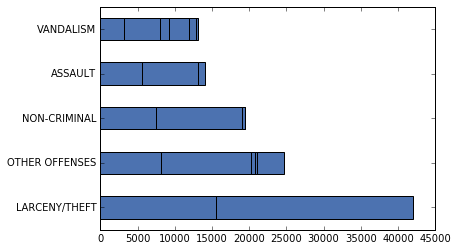

In [23]:
# The way that's not working for me.
# incorrect way # 1
years = list(range(2003, 2017))
for year in years:
    print(year)
    print(df[df['Year'] == str(year)]['Category'].value_counts().head())
    values = df[df['Year'] == str(year)]['Category'].value_counts().head()
    values.plot(kind = 'barh')

2003
LARCENY/THEFT     26393
OTHER OFFENSES    21232
VEHICLE THEFT     15325
ASSAULT           13461
NON-CRIMINAL      13149
Name: Category, dtype: int64
2004
LARCENY/THEFT     24505
OTHER OFFENSES    20710
VEHICLE THEFT     17884
NON-CRIMINAL      13778
ASSAULT           12899
Name: Category, dtype: int64
2005
LARCENY/THEFT     25319
VEHICLE THEFT     18194
OTHER OFFENSES    17834
NON-CRIMINAL      14055
ASSAULT           11601
Name: Category, dtype: int64
2006
LARCENY/THEFT     27352
OTHER OFFENSES    18306
NON-CRIMINAL      13368
ASSAULT           12449
DRUG/NARCOTIC      9069
Name: Category, dtype: int64
2007
LARCENY/THEFT     25770
OTHER OFFENSES    19763
NON-CRIMINAL      12677
ASSAULT           12518
DRUG/NARCOTIC     10560
Name: Category, dtype: int64
2008
LARCENY/THEFT     25807
OTHER OFFENSES    23457
ASSAULT           12681
NON-CRIMINAL      12303
DRUG/NARCOTIC     11648
Name: Category, dtype: int64
2009
LARCENY/THEFT     25585
OTHER OFFENSES    24693
NON-CRIMINAL      12395

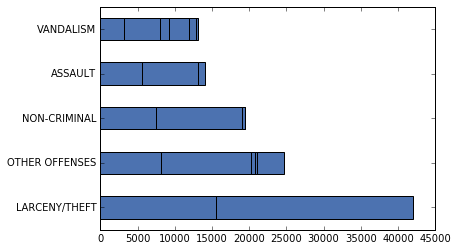

In [22]:
# incorrect way # 2 
years = list(range(2003, 2017))
for year in years:
    print(year)
    print(df[df['Year'] == str(year)]['Category'].value_counts().head())
    values = df[df['Year'] == str(year)]['Category'].value_counts().head()
    values_dict = df[df['Year'] == str(year)]['Category'].value_counts().head().to_dict()
    values.plot(kind = 'barh', x = values_dict.keys(), y = values_dict.values())

In [38]:
# incorrect way # 3
# LARCENY/THEFT

larceny_list = {}
for item in df[(df['Year'] == str(2003)) & (df['Category'] == 'LARCENY/THEFT')]['Category'].value_counts():
    larceny_list[2003] = item

larceny_list

# years = list(range(2003, 2017))
# for year in years:
#     print(year)
#     print(df[df['Year'] == str(year)]['Category'].value_counts().head())
#     values = df[df['Year'] == str(year)]['Category'].value_counts().head()
#     values.plot(kind = 'barh')

<class 'pandas.core.series.Series'>


{2003: 26393}

In [61]:
larceny_dict = {}
larceny_list = []
years = list(range(2003, 2017))

for year in years:
    for item in df[(df['Year'] == str(year)) & (df['Category'] == 'LARCENY/THEFT')]['Category'].value_counts():
        larceny_dict[year] = item
        print('This is', year, 'dictionary:', larceny_dict)
        larceny_list.append(larceny_dict)
        larceny_dict = {}

## Why doesn't this work??
# [[larceny_dict[year] = item for item in df[(df['Year'] == str(year)) & (df['Category'] == 'LARCENY/THEFT')]['Category'].value_counts()] for year in years]  

larceny_list

This is 2003 dictionary: {2003: 26393}
This is 2004 dictionary: {2004: 24505}
This is 2005 dictionary: {2005: 25319}
This is 2006 dictionary: {2006: 27352}
This is 2007 dictionary: {2007: 25770}
This is 2008 dictionary: {2008: 25807}
This is 2009 dictionary: {2009: 25585}
This is 2010 dictionary: {2010: 24446}
This is 2011 dictionary: {2011: 25905}
This is 2012 dictionary: {2012: 30976}
This is 2013 dictionary: {2013: 36412}
This is 2014 dictionary: {2014: 38005}
This is 2015 dictionary: {2015: 42012}
This is 2016 dictionary: {2016: 15559}


[{2003: 26393},
 {2004: 24505},
 {2005: 25319},
 {2006: 27352},
 {2007: 25770},
 {2008: 25807},
 {2009: 25585},
 {2010: 24446},
 {2011: 25905},
 {2012: 30976},
 {2013: 36412},
 {2014: 38005},
 {2015: 42012},
 {2016: 15559}]

In [64]:
larceny_df = pd.DataFrame(larceny_list)
larceny_df

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,26393.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,24505.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,25319.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,27352.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,25770.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,25807.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,25585.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24446.0,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25905.0,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30976.0,NaN,NaN,NaN,NaN


In [65]:
# Figured it out!
# What I really want is Year: 2003 and Larceny_Theft: 26393
larceny_dict = {}
larceny_list = []
years = list(range(2003, 2017))

for year in years:
    for item in df[(df['Year'] == str(year)) & (df['Category'] == 'LARCENY/THEFT')]['Category'].value_counts():
        larceny_dict['Year'] = year
        larceny_dict['Larceny_theft'] = item
        print('This is', year, 'dictionary:', larceny_dict)
        larceny_list.append(larceny_dict)
        larceny_dict = {}

larceny_list

This is 2003 dictionary: {'Year': 2003, 'Larceny_theft': 26393}
This is 2004 dictionary: {'Year': 2004, 'Larceny_theft': 24505}
This is 2005 dictionary: {'Year': 2005, 'Larceny_theft': 25319}
This is 2006 dictionary: {'Year': 2006, 'Larceny_theft': 27352}
This is 2007 dictionary: {'Year': 2007, 'Larceny_theft': 25770}
This is 2008 dictionary: {'Year': 2008, 'Larceny_theft': 25807}
This is 2009 dictionary: {'Year': 2009, 'Larceny_theft': 25585}
This is 2010 dictionary: {'Year': 2010, 'Larceny_theft': 24446}
This is 2011 dictionary: {'Year': 2011, 'Larceny_theft': 25905}
This is 2012 dictionary: {'Year': 2012, 'Larceny_theft': 30976}
This is 2013 dictionary: {'Year': 2013, 'Larceny_theft': 36412}
This is 2014 dictionary: {'Year': 2014, 'Larceny_theft': 38005}
This is 2015 dictionary: {'Year': 2015, 'Larceny_theft': 42012}
This is 2016 dictionary: {'Year': 2016, 'Larceny_theft': 15559}


[{'Larceny_theft': 26393, 'Year': 2003},
 {'Larceny_theft': 24505, 'Year': 2004},
 {'Larceny_theft': 25319, 'Year': 2005},
 {'Larceny_theft': 27352, 'Year': 2006},
 {'Larceny_theft': 25770, 'Year': 2007},
 {'Larceny_theft': 25807, 'Year': 2008},
 {'Larceny_theft': 25585, 'Year': 2009},
 {'Larceny_theft': 24446, 'Year': 2010},
 {'Larceny_theft': 25905, 'Year': 2011},
 {'Larceny_theft': 30976, 'Year': 2012},
 {'Larceny_theft': 36412, 'Year': 2013},
 {'Larceny_theft': 38005, 'Year': 2014},
 {'Larceny_theft': 42012, 'Year': 2015},
 {'Larceny_theft': 15559, 'Year': 2016}]

In [66]:
larceny_df = pd.DataFrame(larceny_list)
larceny_df

,Larceny_theft,Year
0,26393,2003
1,24505,2004
2,25319,2005
3,27352,2006
4,25770,2007
5,25807,2008
6,25585,2009
7,24446,2010
8,25905,2011
9,30976,2012


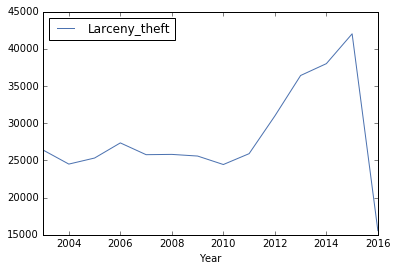

In [68]:
larceny_df.plot(kind = 'line', x = 'Year', y = 'Larceny_theft')

### Things That Have Changed Over The Years:
* Vehicle Theft
* Drug/Narcotics
* Vandalism
* Warrants (made a brief appearance)


4) How frequently do incidents happen in different PdDistricts?
5) Group by year and make graphs for each.
6) What time of day do most crimes happen?
7) What time of day does each type of incident usually happen?
8) What types of resolutions are there?
9) How frequently does each occur?
what percent of each type of crime goes unsolved?
10) Group by year and make graphs for each.
11) This year, what types of incidents are most popular in each district?
12) For the most popular type of incident in Park District, how has its frequency changed over the years (in times/month, since this year isn't over).



# Problematic Things

* Making multiple graphs